NOTA: Este notebook solo contiene codigo para explorar alternativas de estimación de la demanda.

La idea es identificar el algoritmo que mejor se adapta a cada situación y hacer una evaluación de su accuracy.

Haremos las evaluaciónes importando directamente los datos desde la BD y guardando un cache local en modo csv

# IMPORTACIONES BÁSICAS

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CARGAR DATOS DE LA DEMANDA

In [ ]:
# OBTENER PARÁMETROS de la CONEXIÓN

import pyodbc
from dotenv import dotenv_values

secrets = dotenv_values(".env")
local_secrets = dotenv_values(".env.dev")

DRIVER = secrets["DRIVER2"]
SERVIDOR = secrets["SERVIDOR2"]
PUERTO = secrets["PUERTO2"]
BASE = secrets["BASE2"]
USUARIO = secrets["USUARIO2"]
CONTRASENA = secrets["CONTRASENA2"]

constr = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATABASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=10.54.200.90;"
    "PORT=1433;"
    "DATABASE=data-sync;"
    "UID=eettlin;"
    "PWD=lOc4l_eXt$24;"
)

print (constr)
print (conn_str)

DRIVER=ODBC Driver 17 for SQL Server;SERVER=10.54.200.90;PORT=1433;DATABASE=data-sync;UID=eettlin;PWD=lOc4l_eXt$24
DRIVER={ODBC Driver 17 for SQL Server};SERVER=10.54.200.90;PORT=1433;DATABASE=data-sync;UID=eettlin;PWD=lOc4l_eXt$24;


### Listado de Sucursales

id_tienda	suc_nombre	sucursal	formato
1	MERCADO CENTRAL	Mercado Central	MAYORISTA
2	POSADAS	Posadas	MAYORISTA
3	TRELEW	Trelew	MAYORISTA
4	CASANOVA	Casanova	MAYORISTA
5	SAN MARTIN	San Martin	MAYORISTA
7	BARRACAS	Barracas	MAYORISTA
8	NEUQUEN	Neuquen	MAYORISTA
10	JUNIN	Junin	MAYORISTA
11	BAHIA BLANCA	Bahía Blanca	MAYORISTA
12	LA RIOJA	La Rioja	MAYORISTA
13	PILAR	Pilar	MAYORISTA
15	BERAZATEGUI	Berazategui	MAYORISTA
16	CORRIENTES	Corrientes	MAYORISTA
18	PERGAMINO	Pergamino	MAYORISTA
19	ESQUEL	Esquel	MAYORISTA
20	SANTA ROSA	Santa Rosa	MAYORISTA
21	COM. RIVADAVIA	Comod. Rivadavia	MAYORISTA
22	9 DE JULIO	9 de Julio	MAYORISTA
23	BARILOCHE	Bariloche	MAYORISTA
24	LANUS	Lanus	MAYORISTA
25	PINAMAR	Pinamar	MAYORISTA
26	SALTA	Salta	MAYORISTA
27	VILLA MERCEDES	Villa Mercedes	MAYORISTA
28	ZAPALA	Zapala	MAYORISTA
29	MORON	Morón	MAYORISTA
30	RIO GALLEGOS	Río Gallegos	MAYORISTA
31	TANDIL	Tandil	MAYORISTA
32	CORONEL SUAREZ	Coronel Suarez	MAYORISTA
33	CHASCOMUS	Chascomus	MAYORISTA
34	VIEDMA	Viedma	MAYORISTA
35	CONCORDIA	Concordia	MAYORISTA
36	PARANA	Paraná	MAYORISTA
37	RIO GRANDE	Río Grande	MAYORISTA
38	MARTINEZ	Martinez	MAYORISTA
41	BASE 2	Base 2	MAYORISTA
42	CALETA OLIVIA	Caleta Olivia	MAYORISTA
43	R. SAENZ PENA	R.S.Peña	MAYORISTA
44	CALAFATE	Calafate	MAYORISTA
45	SANTIAGO DEL ESTERO	Santiago del Estero	MAYORISTA
46	CUTRAL CO	Cutral-Co	MAYORISTA
47	SAN RAFAEL	San Rafael	MAYORISTA
48	USHUAIA	Ushuaia                                           	MAYORISTA
49	TRENQUE LAUQUEN	Trenque Lauquen	PUEBLO
60	PEHUAJO	Pehuajó	PUEBLO
61	PUERTO DESEADO	Puerto Deseado	PUEBLO
62	TRES ARROYOS	Tres Arroyos	PUEBLO
64	GENERAL PICO	Gral Pico	MAYORISTA
65	ANELO	Añelo	MAYORISTA
66	LUJAN	Luján	MAYORISTA
67	PIEDRABUENA	Piedra Buena	PUEBLO
68	EL BOLSON	El Bolsón	PUEBLO
69	VENADO TUERTO	Venado Tuerto	PUEBLO
70	PICO TRUNCADO	Pico Truncado	PUEBLO
71	JUNIN DE LOS ANDES	Junín de los Andes	PUEBLO
72	SAN MIGUEL	San Miguel	BARRIO
73	GUALEGUAYCHU	Gualeguaychú	PUEBLO
74	CHILECITO	Chilecito	PUEBLO
75	CHOS MALAL	Chos Malal	PUEBLO
76	BOLIVAR	Bolívar	PUEBLO
77	CONCORDIA-DP	Concordia II	PUEBLO
78	RAFAELA	Rafaela	PUEBLO
79	VIEDMA II	Viedma II	MAYORISTA
85	BASE III	BASE III	C.LOGISTICO
86	CONCEPCION TUCUMAN DP	Concepción Tucumán	PUEBLO
87	RIO TURBIO	Río Turbio	MAYORISTA
100	GOYA CORRIENTES-DP	Goya Corrientes	PUEBLO
301	CÓRDOBA 4325	Córdoba 4325	BARRIO
302	EVA PERON 2701 CAP	Eva Peron 2701	BARRIO
303	SAENZ 1136 CAP	Sáenz 1136	BARRIO
304	PATRICIOS 796	Patricios 796	BARRIO
305	CORRIENTES 3374	Corrientes 3374	BARRIO
306	TACUARI 419 CAP	Tacuarí 419	BARRIO
307	PUEYRREDON 582 CAP	Pueyrredón 582	BARRIO
308	CABILDO 4201	Cabildo 4201	BARRIO
309	MONROE 1616	Monroe 1616	BARRIO
310	SANABRIA	Sanabria	BARRIO
311	CORRALES 6902	Corrales 6902	BARRIO
312	ESCALADA	Escalada	BARRIO
313	CASTANARES 4758 CAP	Castañares	BARRIO
314	CHILAVERT	Chilavert	BARRIO
315	PEDERNERA	Pedernera	BARRIO
316	RAMÓN FALCON	Ramón Falcon	BARRIO
317	ENTRE RIOS 785 CAP	Entre Rios 785	BARRIO
318	CABILDO 3327 CAP	Cabildo 3327/9	BARRIO
319	ALVAREZ JONTE 3629 CAP	Miranda 3629 (ex Alvarez Jonte)	BARRIO
320	AV. CAZÓN 1342	Av. Cazón 1342	BARRIO
322	ALMAFUERTE 3464 SAN JUSTO	Almafuerte 3464	BARRIO
323	ALBERDI 6429 CAP	Alberdi 6429	BARRIO
326	AV. URQUIZA 4884	AV. URQUIZA 4884	BARRIO
328	CALLE 897, N° 4322	Calle 897, N° 4322	BARRIO
330	AV. FRANCISCO BEIRÓ 3261	Av. Francisco Beiró 3261	BARRIO
332	RAMÓN LISTA 5020/22	Ramón Lista 5020/22	BARRIO
333	BARTOLOMÉ MITRE 994	Bartolomé Mitre 994	BARRIO
334	AVELLANEDA 1990 CAP	Av. Avellaneda 1990/1992	BARRIO
335	PATRICIOS 945 CAP	Av. Regimiento Patricios 945	BARRIO
336	AV. SANTA FE 4611	Av. Santa Fe 4611	BARRIO
337	AV. BOEDO 452	Av. Boedo 452	BARRIO
339	SAN LORENZO 2301 SAN MARTIN	San Lorenzo 2301	BARRIO
340	DIAZ VELEZ 4402 CAP	Av. Díaz Vélez 4402	BARRIO
341	LAVALLE 520	Lavalle 520	BARRIO
342	MONTES DE OCA 1049 CAP	Av. Montes de Oca 1049	BARRIO
344	RIO DE JANEIRO  838/40	Rio de Janeiro  838/40	BARRIO
345	MARTIN GARCIA 653 CAP	Martín García 653	BARRIO
346	INDEPENDENCIA 2490 CAP	Independencia 2490	BARRIO
348	CORRIENTES 2970 CAP	Corrientes 2970	BARRIO
351	RIVADAVIA 8517 CAP	Rivadavia 8517	BARRIO
353	RAMON CASTILLO	Ramón Castillo 1721	BARRIO
354	HONORIO PUEYRREDON CAP	Honorio Pueyrredon 1740	BARRIO
357	ACOYTE 260 CAP	Acoyte 262	BARRIO
359	BALBIN 3650	Balbin 3650	BARRIO
360	PUEYRREDON 1068	Pueyrredon 1068	BARRIO
361	CORRIENTES 5270 	Corrientes 5270 	BARRIO
362	GASCON 685	Gascon 685	BARRIO
367	AV ALTE BROWN 1057	Av Alte Brown 1057	BARRIO
368	ALVEAR 2331	Alvear 2331	BARRIO
369	LOPE DE VEGA 1888	Lope De Vega 1888	BARRIO
370	BAEZ 777	Baez 777	BARRIO
373	JUAN BAUTISTA ALBERDI 77	Juan Bautista Alberdi 77	BARRIO
381	CORRIENTES 5288	Corrientes 5288	BARRIO
382	RIVADAVIA 8224	Rivadavia 8224	BARRIO
383	SAN MARTIN 546	San Martin 546	BARRIO
384	AV.RIVADAVIA 11678	Av.Rivadavia 11678	BARRIO
385	CORRIENTES 1900	Corrientes 1900	BARRIO
386	RIO DE JANEIRO 793	Rio De Janeiro 793	BARRIO
387	DIAZ VELEZ 41734175	Diaz Velez 41734175	BARRIO
388	AV.CORRALES 7417	Av.Corrales 7417	BARRIO
390	SAN JUAN 2692	San Juan 2692	BARRIO
391	TRIUNVIRATO 4207	Triunvirato 4207	BARRIO
393	FRANCISCO BEIRO  4386 	Francisco Beiro  4386 	BARRIO
394	LAVALLE 1765	Lavalle 1765	BARRIO
395	NAZARRE 251214	Nazarre 251214	BARRIO
396	AV.CABILDO 4662	Av.Cabildo 4662	BARRIO
397	AV.FRANCISCO BEIRO 5450	Av.Francisco Beiro 5450	BARRIO
399	CAMARONES 14121424	Camarones 14121424	BARRIO
400	AV.SARMIENTO 1641	Av.Sarmiento 1641	BARRIO
402	CABELLO 3417	Cabello 3417	BARRIO
403	RIVADAVIA 2446	Rivadavia 2446	BARRIO

### GENERAR DATOS DE SUCURSALES

In [7]:
import pandas as pd
import pyodbc

# Configuración de conexión
conn_str = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATBASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

conn = pyodbc.connect(conn_str)

query = """
-- Consulta con datos históricos y actuales
SELECT V.[F_VENTA] as Fecha
      ,V.[C_ARTICULO] as Codigo_Articulo
      ,V.[C_SUCU_EMPR] as Sucursal
      ,V.[I_PRECIO_VENTA] as Precio
      ,V.[I_PRECIO_COSTO] as Costo
 --     ,V.[I_VENDIDO] as Total 
      ,V.[Q_UNIDADES_VENDIDAS] as Unidades
   
      ,V.[C_FAMILIA] as Familia
      ,A.[C_RUBRO] as Rubro
      ,A.[C_SUBRUBRO_1] as SubRubro
 --     ,A.[C_SUBRUBRO_2]
      ,A.[N_ARTICULO] as Nombre_Articulo
	  ,A.[C_CLASIFICACION_COMPRA] as Clasificacion
 
  FROM [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO] V
  LEFT JOIN [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T050_ARTICULOS] A 
	ON V.C_ARTICULO = A.C_ARTICULO
WHERE V.[C_SUCU_EMPR] BETWEEN  73 AND 73  AND
V.F_VENTA >='20210101';
"""
data = pd.read_sql(query, conn)
conn.close()

C:\Users\eduar\AppData\Local\Temp\ipykernel_2292\1659785625.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


In [13]:
# Guardar en CSV
data.to_csv('data/P073_Gualeguaychú.csv', index=False, encoding='utf-8')

print("Datos guardados exitosamente en 'datos_SanMartin.csv'")

Datos guardados exitosamente en 'datos_SanMartin.csv'


## GENERAR LOCALMENTE TODAS LAS SUCURSALES

In [10]:
import chardet

with open('data/Sucursales.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])  # Muestra la codificación detectada

UTF-8-SIG


In [11]:
import pandas as pd

# Cargar el archivo con codificación UTF-8
sucursales = pd.read_csv('data/Sucursales.csv', encoding='utf-8', sep=';')

# Visualización de las primeras filas\
print(sucursales.head())

sucursales.head()

   id_tienda       suc_nombre         sucursal    formato  \
0          1  MERCADO_CENTRAL  Mercado_Central  MAYORISTA   
1          2          POSADAS          Posadas  MAYORISTA   
2          3           TRELEW           Trelew  MAYORISTA   
3          4         CASANOVA         Casanova  MAYORISTA   
4          5       SAN_MARTIN       San_Martin  MAYORISTA   

                  label  
0  M001_Mercado_Central  
1          M002_Posadas  
2           M003_Trelew  
3         M004_Casanova  
4       M005_San_Martin  


,id_tienda,suc_nombre,sucursal,formato,label
0,1,MERCADO_CENTRAL,Mercado_Central,MAYORISTA,M001_Mercado_Central
1,2,POSADAS,Posadas,MAYORISTA,M002_Posadas
2,3,TRELEW,Trelew,MAYORISTA,M003_Trelew
3,4,CASANOVA,Casanova,MAYORISTA,M004_Casanova
4,5,SAN_MARTIN,San_Martin,MAYORISTA,M005_San_Martin


In [ ]:
import pandas as pd
import pyodbc

# Configuración de conexión a SQL Server
conn_str = f'DRIVER={DRIVER};SERVER={SERVIDOR};PORT={PUERTO};DATABASE={BASE};UID={USUARIO};PWD={CONTRASENA}'

# Conectar a la base de datos
conn = pyodbc.connect(conn_str)

# Iterar sobre cada tienda en el DataFrame "sucursales"
for index, row in sucursales.iterrows():
    tienda = row['id_tienda']  # Asegúrate de que esta columna existe en el DataFrame
    label = row['label']  # Asegúrate de que esta columna existe en el DataFrame
    
    # Reemplazar {tienda} en la consulta con el ID de la tienda actual
    query = f"""
    SELECT V.[F_VENTA] as Fecha
          ,V.[C_ARTICULO] as Codigo_Articulo
          ,V.[C_SUCU_EMPR] as Sucursal
          ,V.[I_PRECIO_VENTA] as Precio
          ,V.[I_PRECIO_COSTO] as Costo
          ,V.[Q_UNIDADES_VENDIDAS] as Unidades
          ,V.[C_FAMILIA] as Familia
          ,A.[C_RUBRO] as Rubro
          ,A.[C_SUBRUBRO_1] as SubRubro
          ,A.[N_ARTICULO] as Nombre_Articulo
          ,A.[C_CLASIFICACION_COMPRA] as Clasificacion
    FROM [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T702_EST_VTAS_POR_ARTICULO] V
    LEFT JOIN [DCO-DBCORE-P02].[DiarcoEst].[dbo].[T050_ARTICULOS] A 
        ON V.C_ARTICULO = A.C_ARTICULO
    WHERE V.[C_SUCU_EMPR] = {tienda} AND V.F_VENTA >= '20240101'
    """

    # Ejecutar la consulta SQL
    data = pd.read_sql(query, conn)

    # Guardar los resultados en un archivo CSV con el nombre de la tienda
    file_path = f'data/{label}.csv'
    data.to_csv(file_path, index=False, encoding='utf-8')

    print(f"Archivo guardado: {file_path}")

# Cerrar la conexión después de la iteración
conn.close()
print("Proceso finalizado.")


# DATASET PARA ALGORITMOS SUPERVISADOS

## CARGA DEL FICHERO

In [12]:
#df = pd.read_csv('direct_marketing.csv')
data.head()

,Fecha,Codigo_Articulo,Sucursal,Precio,Costo,Unidades,Familia,Rubro,SubRubro,Nombre_Articulo,Clasificacion
0,2022-03-07,59734.0,73.0,58.699,44.960,0.0,8.0,3014.0,3022.0,Protectores Diarios Calipso Normal sin desodo...,4.0
1,2022-03-09,12936.0,73.0,108.139,79.357,1.0,6.0,2365.0,2411.0,Cerveza Imperial Lata 473 Cc ...,2.0
2,2022-03-09,12936.0,73.0,120.149,79.357,2.0,6.0,2365.0,2411.0,Cerveza Imperial Lata 473 Cc ...,2.0
3,2022-03-10,52.0,73.0,117.440,101.663,165.0,3.0,2053.0,2056.0,Aceite Cocinero Girasol 900 Ml ...,6.0
4,2022-03-10,62.0,73.0,173.830,150.576,32.0,3.0,2053.0,2056.0,Aceite Cocinero Mezcla 1.5 Lt ...,2.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292220 entries, 0 to 292219
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Fecha            292220 non-null  datetime64[ns]
 1   Codigo_Articulo  292220 non-null  float64       
 2   Sucursal         292220 non-null  float64       
 3   Precio           292220 non-null  float64       
 4   Costo            292220 non-null  float64       
 5   Unidades         292220 non-null  float64       
 6   Familia          292220 non-null  float64       
 7   Rubro            292220 non-null  float64       
 8   SubRubro         292220 non-null  float64       
 9   Nombre_Articulo  292220 non-null  object        
 10  Clasificacion    292220 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 24.5+ MB


## CHAT_GPT o3-mini-higj

# Evaluación de Algoritmos para la Estimación de la Demanda
   Este Notebook tiene como objetivo evaluar distintos enfoques para la estimación de la demanda a partir de datos históricos de ventas. Se abordan procesos de análisis exploratorio, preprocesamiento, modelado y evaluación de modelos. Los ejemplos presentados incluyen métodos estadísticos (ARIMA y Holt-Winters) y un modelo de Machine Learning (Random Forest).

In [14]:
# Importación de librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

%matplotlib inline
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Carga y Exploración Inicial de los Datos

Se asume que los datos se encuentran en un archivo CSV denominado `ventas.csv`. En esta sección se carga el archivo y se realizan inspecciones preliminares

In [15]:
# Carga de datos
df = pd.read_csv('data/datos_Gualelguaychu_Pueblo.csv', parse_dates=['Fecha'])

# Visualización de las primeras filas\
print(df.head())

# Información general del dataframe
print(df.info())

# Estadísticas descriptivas
print(df.describe())

       Fecha  Codigo_Articulo  Sucursal    Precio     Costo  Unidades  \
0 2024-01-02          18124.0      73.0   763.599   545.445      13.0   
1 2024-01-02          18158.0      73.0  1410.699   903.992       1.0   
2 2024-01-02          18181.0      73.0   661.099   452.359       1.0   
3 2024-01-02          18212.0      73.0  1832.149  1398.508       2.0   
4 2024-01-02          18308.0      73.0   722.249   442.636       4.0   

   Familia   Rubro  SubRubro  \
0      8.0  3014.0    3019.0   
1      7.0  2909.0    2917.0   
2      7.0  2909.0    2916.0   
3      2.0  2527.0    2530.0   
4      2.0  2529.0    2573.0   

                                     Nombre_Articulo  Clasificacion  
0  Desodorante Rexona Masc.Odorono Glicerina Crem...            6.0  
1  Rollo de Cocina Campanita Practicorte 1 Un 200...            1.0  
2  Limpiador Cif Baño Biodegradable Doy Pack 450 ...            1.0  
3  Leche Chocolatada Cindor 1Lt                  ...            2.0  
4  Aceitunas Caste

## Análisis Exploratorio de Datos (EDA)

En esta sección se analiza la distribución de las ventas, se detectan posibles valores nulos o atípicos, y se estudia la evolución temporal de la demanda.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292220 entries, 0 to 292219
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Fecha            292220 non-null  datetime64[ns]
 1   Codigo_Articulo  292220 non-null  float64       
 2   Sucursal         292220 non-null  float64       
 3   Precio           292220 non-null  float64       
 4   Costo            292220 non-null  float64       
 5   Unidades         292220 non-null  float64       
 6   Familia          292220 non-null  float64       
 7   Rubro            292220 non-null  float64       
 8   SubRubro         292220 non-null  float64       
 9   Nombre_Articulo  292220 non-null  object        
 10  Clasificacion    292220 non-null  float64       
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 24.5+ MB


In [17]:
## Agregar DATOS de DIA SEMANA y SEMANA AÑO

df['Dia_Semana'] = df['Fecha'].dt.weekday

df['Semana_Año'] = df['Fecha'].dt.isocalendar().week

In [18]:
df.head()


,Fecha,Codigo_Articulo,Sucursal,Precio,Costo,Unidades,Familia,Rubro,SubRubro,Nombre_Articulo,Clasificacion,Dia_Semana,Semana_Año
0,2024-01-02,18124.0,73.0,763.599,545.445,13.0,8.0,3014.0,3019.0,Desodorante Rexona Masc.Odorono Glicerina Crem...,6.0,1,1
1,2024-01-02,18158.0,73.0,1410.699,903.992,1.0,7.0,2909.0,2917.0,Rollo de Cocina Campanita Practicorte 1 Un 200...,1.0,1,1
2,2024-01-02,18181.0,73.0,661.099,452.359,1.0,7.0,2909.0,2916.0,Limpiador Cif Baño Biodegradable Doy Pack 450 ...,1.0,1,1
3,2024-01-02,18212.0,73.0,1832.149,1398.508,2.0,2.0,2527.0,2530.0,Leche Chocolatada Cindor 1Lt ...,2.0,1,1
4,2024-01-02,18308.0,73.0,722.249,442.636,4.0,2.0,2529.0,2573.0,Aceitunas Castell Verde Doy Pack 180gr ...,3.0,1,1


Valores nulos por columna:
Fecha              0
Codigo_Articulo    0
Sucursal           0
Precio             0
Costo              0
Unidades           0
Familia            0
Rubro              0
SubRubro           0
Nombre_Articulo    0
Clasificacion      0
Dia_Semana         0
Semana_Año         0
dtype: int64


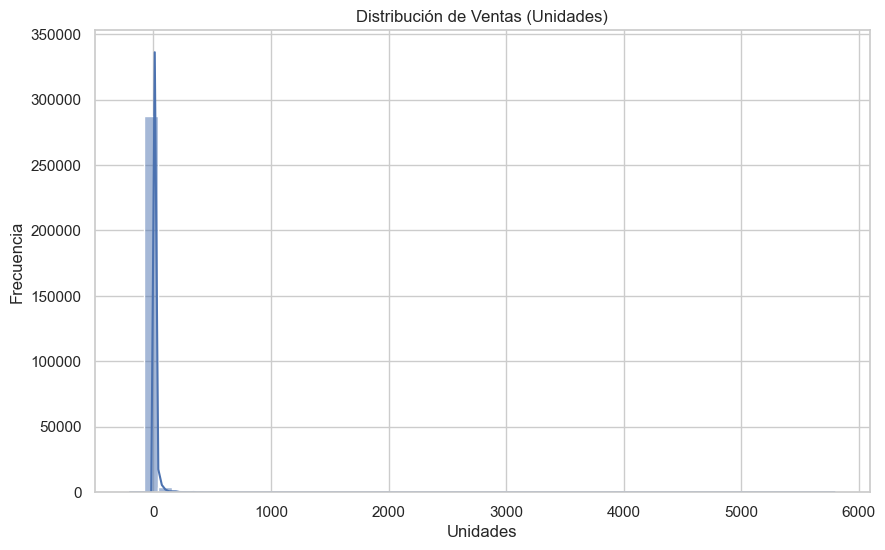

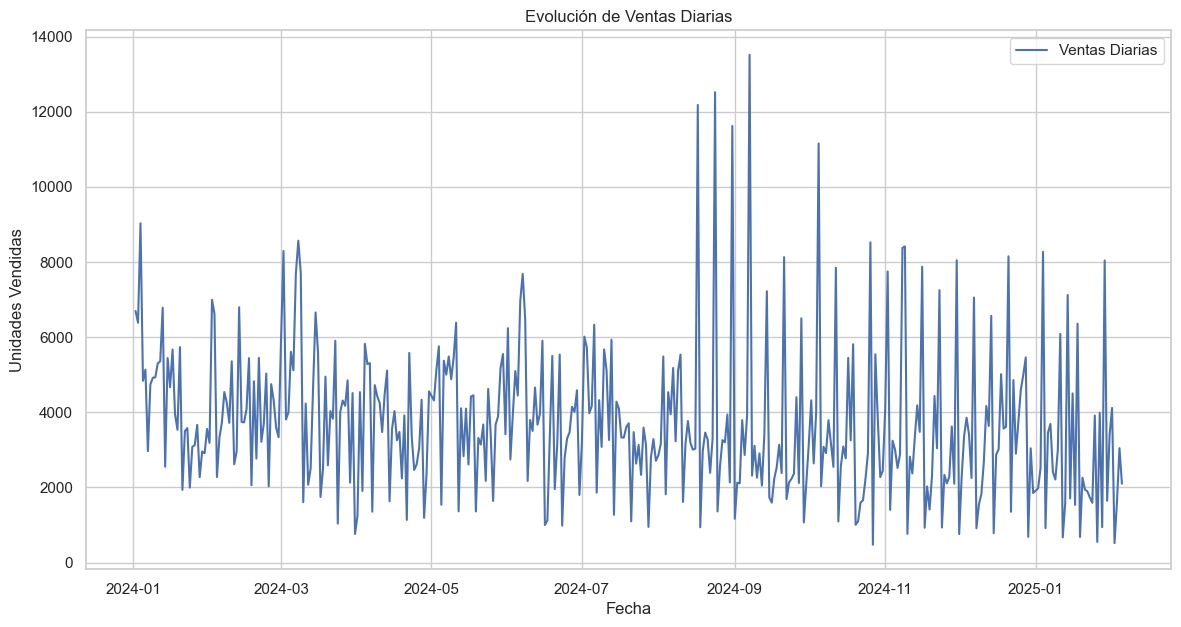

In [19]:
# Comprobación de valores nulos
print('Valores nulos por columna:')
print(df.isnull().sum())

# Análisis de la distribución de ventas (Unidades)
plt.figure(figsize=(10, 6))
sns.histplot(df['Unidades'], bins=50, kde=True)
plt.title('Distribución de Ventas (Unidades)')
plt.xlabel('Unidades')
plt.ylabel('Frecuencia')
plt.show()

# Evolución de ventas a lo largo del tiempo (agrupado por fecha)
ventas_diarias = df.groupby('Fecha')['Unidades'].sum().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(ventas_diarias['Fecha'], ventas_diarias['Unidades'], label='Ventas Diarias')
plt.title('Evolución de Ventas Diarias')
plt.xlabel('Fecha')
plt.ylabel('Unidades Vendidas')
plt.legend()
plt.show()

## Preprocesamiento y Transformación de los Datos

Se procede a convertir la columna `Fecha` en el índice del dataframe. Además, se selecciona un ejemplo representativo (un artículo y una tienda) para realizar la predicción. Posteriormente, se agrupan las ventas por día y se generan variables derivadas (lags y medias móviles) para enriquecer la información de entrada."

In [20]:
# Convertir la columna 'Fecha' en índice
df.set_index('Fecha', inplace=True)

# Seleccionar un ejemplo: se elige un artículo y una tienda específicos
codigo_articulo_ej = df['Codigo_Articulo'].unique()[0]
sucursal_ej = df['Sucursal'].unique()[0]

df_ej = df[(df['Codigo_Articulo'] == codigo_articulo_ej) & (df['Sucursal'] == sucursal_ej)].copy()

# Agrupar las ventas por día
ventas_diarias_ej = df_ej['Unidades'].resample('D').sum().fillna(0)

print(ventas_diarias_ej.head())

Fecha
2024-01-02    13.0
2024-01-03    16.0
2024-01-04    17.0
2024-01-05     4.0
2024-01-06    29.0
Freq: D, Name: Unidades, dtype: float64


### Creación de Variables (Feature Engineering)

Se generan variables de retardo (lag) y medias móviles para incorporar información histórica en el modelo de Machine Learning.

In [21]:
df_model = ventas_diarias_ej.to_frame(name='Unidades')

# Crear variables de lag (por ejemplo, 1, 7 y 14 días)
for lag in [1, 7, 14]:
    df_model[f'lag_{lag}'] = df_model['Unidades'].shift(lag)

# Crear variable de media móvil de 7 días
df_model['rolling_mean_7'] = df_model['Unidades'].rolling(window=7).mean()

# Eliminar valores nulos generados por el lag y la media móvil
df_model.dropna(inplace=True)

print(df_model.head())

            Unidades  lag_1  lag_7  lag_14  rolling_mean_7
Fecha                                                     
2024-01-16      11.0    0.0   14.0    13.0       13.571429
2024-01-17       5.0   11.0   10.0    16.0       12.857143
2024-01-18      12.0    5.0   21.0    17.0       11.571429
2024-01-19      22.0   12.0    7.0     4.0       13.714286
2024-01-20       3.0   22.0   39.0    29.0        8.571429


## División de Datos en Entrenamiento y Prueba

Se define un corte temporal para separar el conjunto en datos de entrenamiento y de prueba. En este ejemplo, se utiliza el último mes de datos como conjunto de prueba.

In [22]:
train_end = df_model.index.max() - pd.Timedelta(days=30)
train_data = df_model.loc[:train_end]
test_data = df_model.loc[train_end + pd.Timedelta(days=1):]

print('Periodo de Entrenamiento:', train_data.index.min(), 'a', train_data.index.max())
print('Periodo de Prueba:', test_data.index.min(), 'a', test_data.index.max())

Periodo de Entrenamiento: 2024-01-16 00:00:00 a 2025-01-06 00:00:00
Periodo de Prueba: 2025-01-07 00:00:00 a 2025-02-05 00:00:00


## Modelado

A continuación se presentan tres enfoques de modelado:

1. **ARIMA:** Modelo estadístico para series temporales.
2. **Holt-Winters:** Suavizamiento exponencial con componentes para tendencia y estacionalidad.
3. **Random Forest:** Modelo de Machine Learning basado en árboles de decisión, utilizando las variables derivadas.

### 1. Modelo ARIMA

Se ajusta un modelo ARIMA sobre la serie temporal de entrenamiento y se realizan predicciones para el conjunto de prueba.

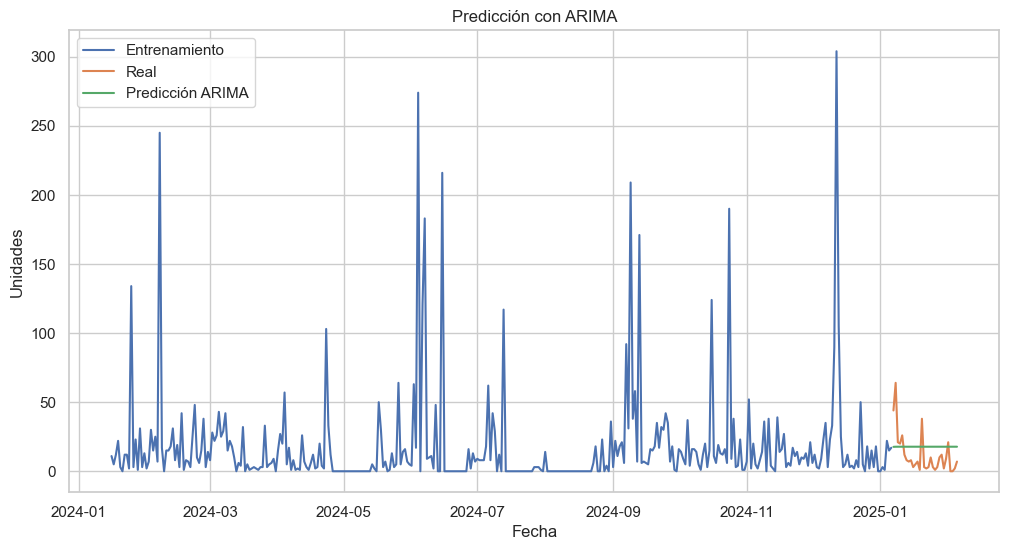

In [23]:
# Ajuste de un modelo ARIMA
# Se define el orden del modelo (p, d, q); este parámetro puede ser optimizado
arima_order = (1, 1, 1)

model_arima = ARIMA(train_data['Unidades'], order=arima_order)
model_arima_fit = model_arima.fit()

# Predicción sobre el conjunto de prueba
pred_arima = model_arima_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, test_data['Unidades'], label='Real')
plt.plot(test_data.index, pred_arima, label='Predicción ARIMA')
plt.title('Predicción con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

### 2. Modelo Holt-Winters (Exponential Smoothing)

Se utiliza el método de Holt-Winters para modelar la serie teniendo en cuenta la tendencia y la estacionalidad (con periodicidad semanal en este ejemplo)

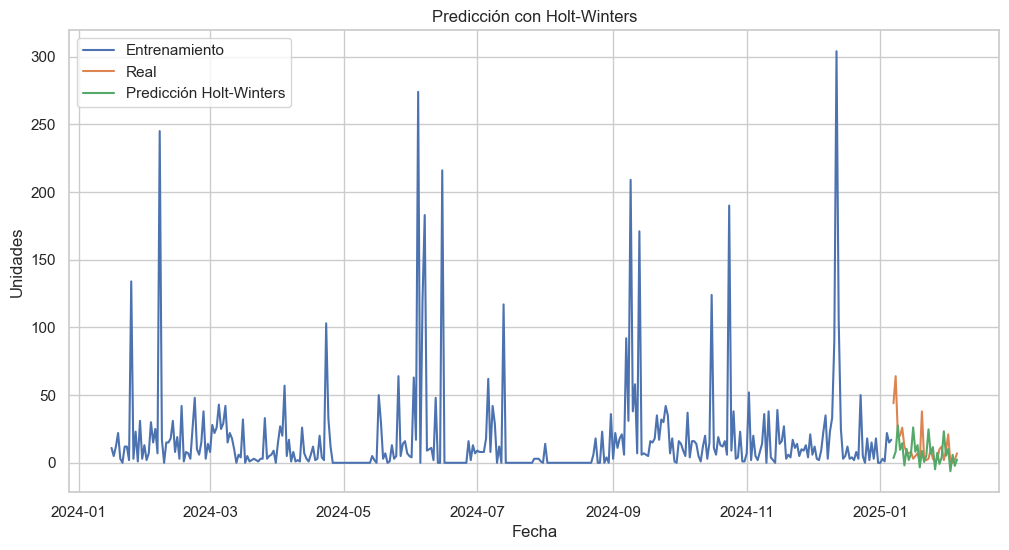

In [24]:
# Ajuste del modelo Holt-Winters
model_hw = ExponentialSmoothing(train_data['Unidades'], trend='add', seasonal='add', seasonal_periods=7)
model_hw_fit = model_hw.fit()

# Predicción sobre el conjunto de prueba
pred_hw = model_hw_fit.forecast(steps=len(test_data))

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, test_data['Unidades'], label='Real')
plt.plot(test_data.index, pred_hw, label='Predicción Holt-Winters')
plt.title('Predicción con Holt-Winters')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

### 3. Modelo de Machine Learning: Random Forest

Se entrena un modelo de Random Forest utilizando las variables de retardo y medias móviles obtenidas en el feature engineering.

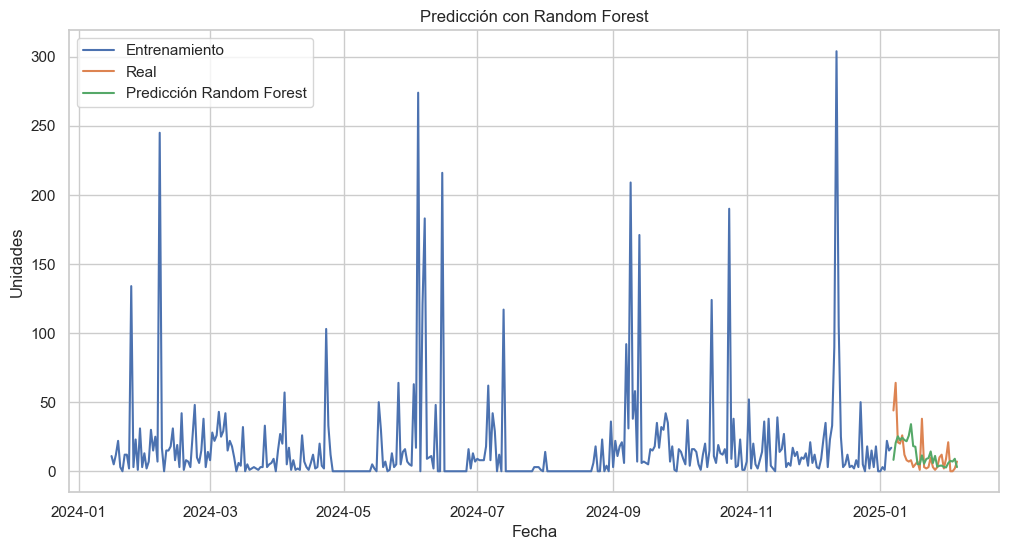

In [25]:
# Preparación de datos para el modelo de Machine Learning
features = [col for col in df_model.columns if col != 'Unidades']

X_train = train_data[features]
y_train = train_data['Unidades']

X_test = test_data[features]
y_test = test_data['Unidades']

# Entrenamiento del modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
pred_rf = rf_model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(train_data.index, train_data['Unidades'], label='Entrenamiento')
plt.plot(test_data.index, y_test, label='Real')
plt.plot(test_data.index, pred_rf, label='Predicción Random Forest')
plt.title('Predicción con Random Forest')
plt.xlabel('Fecha')
plt.ylabel('Unidades')
plt.legend()
plt.show()

## Evaluación de Resultados

Se calculan las principales métricas de error para cada uno de los modelos: RMSE, MAE y MAPE. Esto permitirá comparar objetivamente el desempeño de los distintos enfoques.

In [26]:
# Función para calcular MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Evaluación ARIMA
rmse_arima = sqrt(mean_squared_error(test_data['Unidades'], pred_arima))
mae_arima = mean_absolute_error(test_data['Unidades'], pred_arima)
mape_arima = mean_absolute_percentage_error(test_data['Unidades'], pred_arima)

print('ARIMA:')
print(f'RMSE: {rmse_arima:.2f}')
print(f'MAE: {mae_arima:.2f}')
print(f'MAPE: {mape_arima:.2f}%')

# Evaluación Holt-Winters
rmse_hw = sqrt(mean_squared_error(test_data['Unidades'], pred_hw))
mae_hw = mean_absolute_error(test_data['Unidades'], pred_hw)
mape_hw = mean_absolute_percentage_error(test_data['Unidades'], pred_hw)

print('\\nHolt-Winters:')
print(f'RMSE: {rmse_hw:.2f}')
print(f'MAE: {mae_hw:.2f}')
print(f'MAPE: {mape_hw:.2f}%')

# Evaluación Random Forest
rmse_rf = sqrt(mean_squared_error(y_test, pred_rf))
mae_rf = mean_absolute_error(y_test, pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, pred_rf)

print('\\nRandom Forest:')
print(f'RMSE: {rmse_rf:.2f}')
print(f'MAE: {mae_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')

ARIMA:
RMSE: 15.63
MAE: 13.34
MAPE: inf%
\nHolt-Winters:
RMSE: 16.56
MAE: 11.28
MAPE: inf%
\nRandom Forest:
RMSE: 14.62
MAE: 10.43
MAPE: inf%


In [27]:
def smape(y_true, y_pred):
    # Convertir a arrays de NumPy para facilitar las operaciones vectorizadas
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Calcular el denominador de la fórmula: suma de los valores absolutos de y_true y y_pred
    denominator = np.abs(y_true) + np.abs(y_pred)
    # Evitar la división por cero: donde el denominador es cero, se asigna 0 (ya que 0/0 se considera error nulo en este contexto)
    smape_values = np.where(denominator == 0, 0, 2.0 * np.abs(y_true - y_pred) / denominator)
    # Calcular el SMAPE medio y multiplicar por 100 para expresarlo en porcentaje
    return np.mean(smape_values) * 100

# Reemplazar la línea original de MAPE por la siguiente:
smape_arima = smape(test_data['Unidades'], pred_arima)
smape_hw = smape(test_data['Unidades'], pred_hw)
smape_rf = smape(y_test, pred_rf)


print('\\Metricas SMAPE:')
print(f'Ramdon Forest: {smape_rf:.2f}')
print(f'Hot Winters: {smape_hw:.2f}')
print(f'ARIMA: {smape_arima:.2f}%')

\Metricas SMAPE:
Ramdon Forest: 93.85
Hot Winters: 117.77
ARIMA: 102.67%


## Conclusiones y Siguientes Pasos

El presente Notebook demuestra un enfoque integral para la evaluación de diferentes algoritmos de predicción de la demanda. Se recomienda continuar con la optimización de hiperparámetros, explorar modelos adicionales (incluyendo técnicas de deep learning y métodos de ensemble) y, finalmente, integrar el pipeline en el sistema de reposición automática para su validación en un entorno real.

El grupo de trabajo puede beneficiarse de incluir variables que representen tanto el día de la semana como la semana del año, ya que ambas permiten capturar diferentes niveles de estacionalidad y patrones cíclicos en los datos. En particular:

### Día de la semana:
La incorporación de esta variable puede ser especialmente útil para capturar efectos a corto plazo. En muchos entornos, especialmente en el sector retail, se observa que la demanda varía significativamente entre días laborables y fines de semana. Por ejemplo, es común que se registren picos de ventas en ciertos días (por ejemplo, durante el fin de semana o en días con promociones especiales). Esta variable, al ser de naturaleza categórica, puede incluirse mediante codificación dummy o utilizando transformaciones que permitan capturar dichas variaciones.

### Semana del año:
La variable que indica la semana del año ayuda a identificar patrones de largo plazo y tendencias estacionales que se repiten anualmente, tales como las variaciones propias de temporadas de vacaciones, festividades o campañas estacionales. Este enfoque resulta relevante cuando la demanda presenta fluctuaciones significativas a lo largo del año, permitiendo al modelo ajustarse a estas variaciones y mejorar la precisión en periodos específicos.

El grupo de trabajo deberá, a partir de un análisis exploratorio de los datos, determinar cuál de estas variables (o la combinación de ambas) aporta mayor valor predictivo. Es importante tener en cuenta que la inclusión simultánea de ambas puede aportar información complementaria, pero también podría generar redundancias o problemas de multicolinealidad si las dos variables están altamente correlacionadas. Por ello, se recomienda realizar pruebas empíricas y análisis de sensibilidad para validar la utilidad de cada variable en el contexto específico de la demanda a estimar.

## Opinión GENERAL
La incorporación tanto del día de la semana como de la semana del año suele resultar ventajosa, siempre que se respalde con un análisis previo que confirme la existencia de patrones estacionales a diferentes escalas temporales. Se sugiere lo siguiente:

### Evaluación empírica:
Es recomendable que el grupo de trabajo realice un análisis de descomposición de la serie temporal para identificar si existen patrones estacionales diarios o anuales. De esta forma, se podrá determinar si los cambios en la demanda se relacionan de forma consistente con días específicos de la semana o si existen fluctuaciones a nivel semanal que justifiquen la inclusión de la semana del año.

### Manejo de la multicolinealidad:
En caso de que ambas variables muestren una correlación alta, podría ser prudente aplicar técnicas de reducción de dimensionalidad o selección de variables para evitar redundancias en el modelo, lo que permitirá que la predicción sea más robusta y que se maximice la capacidad explicativa del conjunto de variables.

### Flexibilidad del modelo:
La combinación de ambas variables puede aportar un mayor grado de precisión al modelo de predicción, ya que permite captar tanto las variaciones de corto plazo (día a día) como las tendencias de largo plazo (ciclo anual). Esto es especialmente relevante en contextos donde la demanda se ve influenciada por factores operativos diarios y por eventos estacionales o promocionales.

En resumen, ChatGPT opina que, de implementarse correctamente y tras una adecuada validación empírica, la inclusión de estas variables estacionales puede mejorar significativamente el rendimiento predictivo del modelo, ofreciendo una visión más completa y adaptada a los patrones inherentes a la demanda.

In [7]:
data.Unidades.value_counts()

Unidades
1.000    203392
2.000     95719
3.000     78464
6.000     40999
4.000     34752
          ...  
6.944         1
3.456         1
1.179         1
4.354         1
1.686         1
Name: count, Length: 4806, dtype: int64

## BALANCEO DE CLASES

In [4]:
from sklearn.utils import resample

df_majority = data[data['conversion'] == 0]
df_minority = data[data['conversion'] == 1]

df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

df_balanced = pd.concat([df_majority_downsampled, df_minority])

## PREDICTORAS Y TARGET

In [22]:
X = data[['Fecha',
 'Codigo_Articulo',
 'Sucursal',
 'Precio',
 'Costo',
 'Familia',
 'Rubro',
 'SubRubro',
 'Clasificacion']]
      
y = data.Unidades       

## PREPARACIÓN DE DATOS

In [19]:
from sklearn.preprocessing import OneHotEncoder

object_columns = X.select_dtypes(include=['object']).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')

X_encoded = pd.DataFrame(encoder.fit_transform(X[object_columns]))
X_encoded.columns = encoder.get_feature_names_out(object_columns)

X = X.drop(object_columns, axis=1).reset_index()


In [7]:
X = pd.concat([X, X_encoded], axis=1)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns = X.columns
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=columns)


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

## SEPARACIÓN DE TRAIN Y TEST

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## FUNCIÓN PARA MEDIR EL ERROR

In [24]:
from sklearn.metrics import roc_auc_score

def mide_error(nombre_modelo, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print(f'AUC de {nombre_modelo}: ', round(auc,2))

# DATASET PARA SERIES TEMPORALES

## CARGA DEL FICHERO

In [25]:
import statsmodels.api as sm

df_st = sm.datasets.macrodata.load_pandas().data.loc[:,['year','quarter','infl']]
#df_st['period'] = pd.PeriodIndex(year=df_st['year'], quarter=df_st['quarter'], freq='Q')
df_st['Fecha'] = pd.PeriodIndex.from_fields(year=df_st['year'], quarter=df_st['quarter'], freq='Q')

df_st.set_index('Fecha', inplace=True)
df_st.drop(['year', 'quarter'], axis=1, inplace=True)
df_st.head()

,infl
Fecha,
1959Q1,0.00
1959Q2,2.34
1959Q3,2.74
1959Q4,0.27
1960Q1,2.31


## SEPARACIÓN DE TRAIN Y TEST

In [26]:
train_data = df_st.iloc[:-4]
test_data = df_st.iloc[-4:] 
train_data = train_data['infl'].values.astype(np.float64)

# REGRESIÓN LOGÍSTICA

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)

y_pred = logreg.predict_proba(X_test)[:,1]

mide_error('Regresión Logística', y_pred)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>)

# KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict_proba(X_test)[:,1]

mide_error('KNN', y_pred)

AUC de KNN:  0.57


# NAIVE BAYES

In [16]:
from sklearn.naive_bayes import BernoulliNB

naive_bayes = BernoulliNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict_proba(X_test)[:,1]

mide_error('Naive Bayes', y_pred)

AUC de Naive Bayes:  0.58


# K-MEDIAS

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(X_train)

kmeans.labels_[:10]

array([0, 2, 4, 3, 3, 2, 3, 1, 3, 4], dtype=int32)

# ÁRBOL DE DECISIÓN

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict_proba(X_test)[:,1]

mide_error('Árbol de Decisión', y_pred)

AUC de Árbol de Decisión:  0.58


# ARIMA

In [25]:
from pmdarima import auto_arima


model = auto_arima(train_data, seasonal=False, suppress_warnings=True)
model_fit = model.fit(train_data)
predictions = model_fit.predict(n_periods=len(test_data))


plt.figure(figsize=(12, 6))
plt.plot(df_st[-12:].index.strftime('%YQ%q'), df_st[-12:].infl, label='Realidad')
plt.plot(df_st[-4:].index.strftime('%YQ%q'), predictions, label='Predicción')
plt.xticks(rotation=45, fontsize=8);

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

# SUAVIZADO EXPONENCIAL

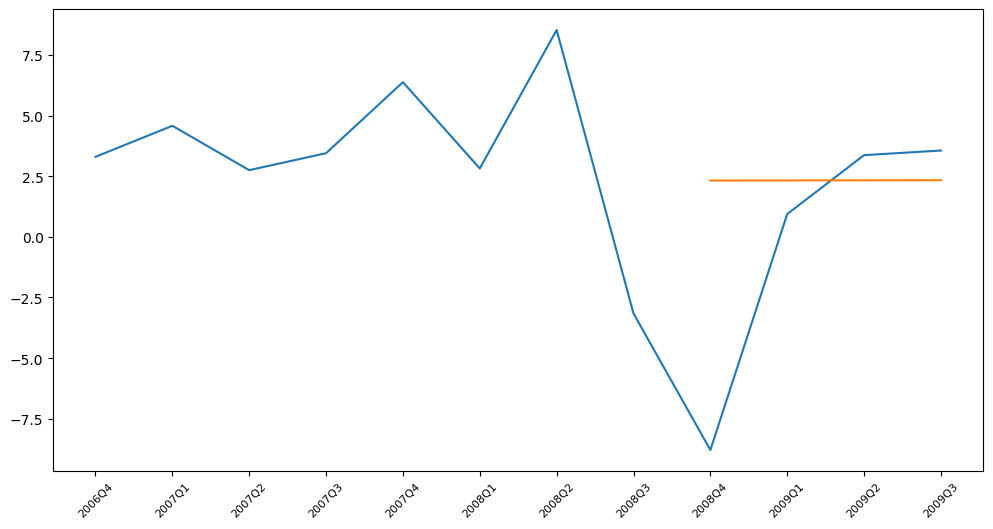

In [26]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, seasonal=None, trend='add')
model_fit = model.fit()
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

plt.figure(figsize=(12, 6))
plt.plot(df_st[-12:].index.strftime('%YQ%q'), df_st[-12:].infl, label='Realidad')
plt.plot(df_st[-4:].index.strftime('%YQ%q'), predictions, label='Predicción')
plt.xticks(rotation=45, fontsize=8);

# RANDOM FOREST

In [27]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict_proba(X_test)[:,1]

mide_error('Random Forest', y_pred)


AUC de Random Forest:  0.58


# XGBBOOST

In [28]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict_proba(X_test)[:,1]

mide_error('XGBboost', y_pred)

AUC de XGBboost:  0.53


# LIGHTGBM

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

hist_gradient_boosting = HistGradientBoostingClassifier()
hist_gradient_boosting.fit(X_train, y_train)

y_pred = hist_gradient_boosting.predict_proba(X_test)[:,1]

mide_error('XGBboost', y_pred)

AUC de XGBboost:  0.54
